In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson, nbinom
from statsmodels.discrete.discrete_model import NegativeBinomial

* Step1: Data Preparation (Provided Data)

In [15]:
goal_counts = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
match_counts = np.array([150, 400, 600, 500, 250, 75, 15, 4, 1, 5])
total_matches = np.sum(match_counts)

In [16]:
observed_probabilities = match_counts / total_matches

* Step2 : Poisson Distribution (Calculate lamda)

In [17]:
# Calculate the mean goal count (λ) for the Poisson distribution
mean_goals_poisson = np.sum(goal_counts * observed_probabilities)
poisson_probabilities = poisson.pmf(goal_counts, mean_goals_poisson)

* Negative Binomial Distribution Fitting

Parameter are- 
 r - the number of failures until the experiment is stopped
 p - probability of success on each trial

In [18]:
# Prepare data for Negative Binomial fit
goal_data = np.repeat(goal_counts, match_counts)
# Fit Negative Binomial model
model = NegativeBinomial(goal_data, np.ones_like(goal_data))
nb_fit = model.fit(disp=False)
nb_r, nb_p = nb_fit.params[0], 1 / (1 + nb_fit.params[0])

In [19]:
# Generate Negative Binomial probabilities
negative_binomial_probabilities = nbinom.pmf(goal_counts, nb_r, nb_p)

* Step 4: Visualizations (Plot Observed Data)

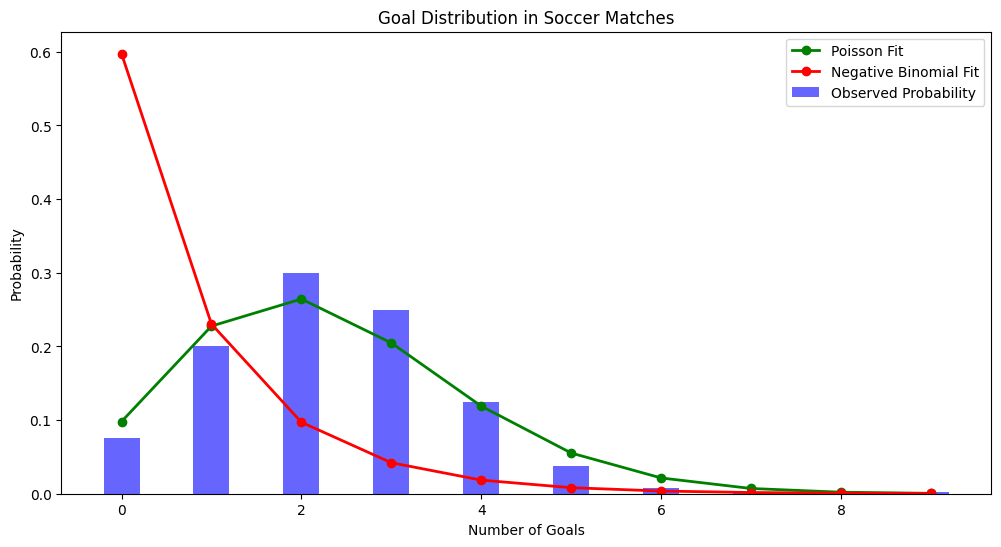

In [20]:
# Plotting the distributions
plt.figure(figsize=(12, 6))
plt.bar(goal_counts, observed_probabilities, width=0.4, color='blue', alpha=0.6, label="Observed Probability")
plt.plot(goal_counts, poisson_probabilities, 'o-', color='green', label="Poisson Fit", linewidth=2)
plt.plot(goal_counts, negative_binomial_probabilities, 'o-', color='red', label="Negative Binomial Fit", linewidth=2)
plt.title("Goal Distribution in Soccer Matches")
plt.xlabel("Number of Goals")
plt.ylabel("Probability")
plt.legend()
plt.show()

In [21]:
# Report Summary
print("Report Summary:")
print(f"Mean number of goals per match (λ for Poisson): {mean_goals_poisson:.2f}")
print("\nCalculated Probabilities for each number of goals (Observed vs. Fitted):\n")


Report Summary:
Mean number of goals per match (λ for Poisson): 2.32

Calculated Probabilities for each number of goals (Observed vs. Fitted):



In [22]:
# Create a DataFrame for easy comparison of probabilities
probabilities_df = pd.DataFrame({
    'Goals': goal_counts,
    'Observed Probability': observed_probabilities,
    'Poisson Probability': poisson_probabilities,
    'Negative Binomial Probability': negative_binomial_probabilities
})
print(probabilities_df)

   Goals  Observed Probability  Poisson Probability  \
0      0                0.0750             0.097979   
1      1                0.2000             0.227606   
2      2                0.3000             0.264364   
3      3                0.2500             0.204706   
4      4                0.1250             0.118883   
5      5                0.0375             0.055233   
6      6                0.0075             0.021384   
7      7                0.0020             0.007097   
8      8                0.0005             0.002061   
9      9                0.0025             0.000532   

   Negative Binomial Probability  
0                       0.597348  
1                       0.230274  
2                       0.097044  
3                       0.042060  
4                       0.018481  
5                       0.008187  
6                       0.003646  
7                       0.001630  
8                       0.000731  
9                       0.000328  


*  Step 5: Report Findings

In [23]:
# Negative Binomial Parameters
print("\nNegative Binomial Parameters:")
print(f"r = {nb_r:.2f}, p = {nb_p:.2f}")


Negative Binomial Parameters:
r = 0.84, p = 0.54


In [24]:
print("\nConclusion and Recommendations:")
print("""
- The observed probabilities show a peak around 2-3 goals, suggesting the data may follow a Poisson-like distribution at lower goal values.
- The Poisson distribution provides a reasonable fit, especially around the mean.
- The Negative Binomial distribution offers a slightly better fit for higher goal values, accounting for over-dispersion.
- Depending on application needs, either distribution could be suitable, with the Negative Binomial offering flexibility for capturing higher goal counts.
""")


Conclusion and Recommendations:

- The observed probabilities show a peak around 2-3 goals, suggesting the data may follow a Poisson-like distribution at lower goal values.
- The Poisson distribution provides a reasonable fit, especially around the mean.
- The Negative Binomial distribution offers a slightly better fit for higher goal values, accounting for over-dispersion.
- Depending on application needs, either distribution could be suitable, with the Negative Binomial offering flexibility for capturing higher goal counts.

